# Wine Quality Classification

In this assignment, we will use logistic regression to judge the quality of wines. The dataset is taken from UCI machine learning repository. For description of the dataset, see [here](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Attributes of the dataset are listed as following:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Output variable (based on sensory data): 
12. quality (score between 0 and 10)

The following code loads the dataset, and the dataset looks like the following:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
#train = np.genfromtxt('wine_training1.txt', delimiter=',')
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
red = shuffle(red, random_state = 10)
white = shuffle(white, random_state = 10)
red.head(10)
white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6
937,6.1,0.36,0.58,15.0,0.044,42.0,115.0,0.99780,3.15,0.51,9.0,5
1217,8.0,0.61,0.38,12.1,0.301,24.0,220.0,0.99930,2.94,0.48,9.2,5
3296,6.6,0.28,0.42,8.2,0.044,60.0,196.0,0.99562,3.14,0.48,9.4,5
4524,6.6,0.16,0.25,9.8,0.049,59.5,137.0,0.99500,3.16,0.38,10.0,6
3640,6.8,0.19,0.33,4.9,0.047,42.0,130.0,0.99283,3.12,0.56,11.0,6
785,7.6,0.30,0.27,10.6,0.039,31.0,119.0,0.99815,3.27,0.30,9.3,6
393,7.3,0.24,0.43,2.0,0.021,20.0,69.0,0.99000,3.08,0.56,12.2,6
562,7.7,0.34,0.27,8.8,0.063,39.0,184.0,0.99690,3.09,0.63,9.2,6
1285,7.8,0.16,0.41,1.7,0.026,29.0,140.0,0.99100,3.02,0.78,12.5,6


## Data Splitting
To get this into a binary classification task. We split the quality into a binary feature *good* or *bad* depending on whether the quality is larger than 6 or not.

Next we randomly pick $70\%$ of the data to be our training set and the remaining for testing for both red and white wines.

In [2]:
from sklearn.model_selection import train_test_split
X_red = red.iloc[:, :-1]
y_red = red.iloc[:, -1] >= 6

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state = 0)

X_white = white.iloc[:, :-1]
y_white = white.iloc[:, -1] >= 6
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state = 0)

#y_red.head(10)
y_white.head(10)

4731     True
937     False
1217    False
3296    False
4524     True
3640     True
785      True
393      True
562      True
1285     True
Name: quality, dtype: bool

## Problem 1 Logistic Regression for Red Wine

Using scikit learn, train a Logistic Regression classifier using 'X_trn_red, y_trn_red'. Use the
solver sag, which stands for Stochastic Average Gradient. Set max iteration to be 10000. Test the model on X_test_red. Output the testing error.

In [3]:
#========Your code here ======

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_red = LogisticRegression(solver='sag', max_iter = 10000).fit(X_train_red, y_train_red) 
y_pred_red = clf_red.predict(X_test_red)
error_red = 1 - accuracy_score(y_pred_red, y_test_red)

#========================
print('The testing error for red wine is: ' + str(error_red) + '.')

The testing error for red wine is: 0.275.


## Problem 2 Logistic Regression for White Wine

Using scikit learn, train a Logistic Regression classifier using 'X_trn_white, y_trn_white'. Use the
solver sag, which stands for Stochastic Average Gradient. Set max iteration to be 10000. Test the model on X_test_white. Output the testing error.

In [4]:
#========Your code here ======

clf_white = LogisticRegression(solver='sag', max_iter = 10000).fit(X_train_white, y_train_white) 
y_pred_white = clf_white.predict(X_test_white)
error_white = 1 - accuracy_score(y_pred_white, y_test_white)

#========================
print('The testing error for white wine is: ' + str(error_white) + '.')

The testing error for white wine is: 0.2612244897959184.


## Problem 3 
Use the model you trained using 'X_trn_white, y_trn_white' to test on 'X_test_red' and use the model you trained on 'X_test_white'. Print out the errors and compare with previous results. Explain.

In [5]:
#========Your code here ======

y_pred_red = clf_white.predict(X_test_red)
error_red = 1 - accuracy_score(y_pred_red, y_test_red)

y_pred_white = clf_red.predict(X_test_white)
error_white =  1 - accuracy_score(y_pred_white, y_test_white)

#========================
print('The testing error for red wine using white wine training data is: ' + str(error_red) + '.')
print('The testing error for white wine using red wine training data is: ' + str(error_white) + '.')

The testing error for red wine using white wine training data is: 0.35624999999999996.
The testing error for white wine using red wine training data is: 0.34013605442176875.


### Explaination 
The predicted error  of red wine using the white training models increases and the predicted error of white wine by the red wine training model increases as well. This is because the white wine training model uses the white wine data and features to generate the model so when predicting the red wine by it, the error will be bigger. Same thing will happen to the situation that use red wine model to predict the white wine's quality. 

# Problem 4 The effect of regularization
Using red wine dataset. Implement logistic regression in sklearn, using $\ell_2$ regularization with regularizer value C in the set $\{0.00001 \times 4^i: i = 0,1,2,..., 14\}$. (The regularization parameter is 'C' in scikit-learn, which is the inverse of $\lambda$ we see in class). Plot the training error and test error with respect to the regularizer value. Explain what you get.

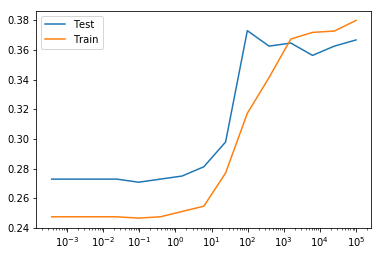

In [7]:
N = np.array(range(0,15))
alpha = 0.00001*(4**N)
error_trn = np.zeros(15)
error_tst = np.zeros(15)
#========Your code here ======

for i in range(0,15): 
    clf_red = LogisticRegression(C = alpha[i], solver='sag', max_iter = 10000).fit(X_train_red, y_train_red) 
    error_tst[i] = 1 - accuracy_score(clf_red.predict(X_test_red), y_test_red)
    error_trn[i] = 1 - accuracy_score(clf_red.predict(X_train_red), y_train_red)

#========================
plt.figure(1)
plt.semilogx(1/alpha, error_tst,label = 'Test')
plt.semilogx(1/alpha, error_trn, label = 'Train')
plt.legend()

### Explanation
As we all known, the value of the $\lambda$ could represent the complexity of model. When the $\lambda$ is too big, the model is too simple and it could be underfitting. Hence, the prediction of the data is just like a guess, so the error increases as the $\lambda$ increasing. Besides, when the $\lambda$ is too small at first, the model will become too complex and even overfitting. That is why the test error is much larger than the training error when the $\lambda$ is too small. 
